H0 2 thuộc tính không tương quan
H1 2 thuộc tính có tương quan
pvalue >= alpha H0 đúng
r = +-1 ==> tương quan chặt
r >  0 tương quan thuận
r < 0 tương quan nghịch

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = [2.0, 2.3, 4, 3.1, 5]
y = [3, 4, 5.5, 4.7, 7.3]

mx = np.mean(x)
my = np.mean(y)
subx = x-mx
suby = y-my
tu = np.sum(subx*suby)
tu
mau = (np.sum(subx**2)*np.sum(suby**2))**0.5
mau
r = tu/mau
r


0.9839751610206264

In [4]:
import scipy.stats as stats
stats.pearsonr(x,y)

PearsonRResult(statistic=0.9839751610206264, pvalue=0.0024292806196178785)

In [5]:
stats.pearsonr(y,x)

PearsonRResult(statistic=0.9839751610206264, pvalue=0.0024292806196178785)

In [13]:
z = -2*np.array(x)

In [14]:
stats.pearsonr(y,z)

PearsonRResult(statistic=-0.9839751610206264, pvalue=0.0024292806196178785)

In [ ]:
x = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
y = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

Vẽ đồ thị thể hiện mối tương quan giữa x và y sử dụng seaborn (lmplot)
Kiểm định mối tương quan x và y bằng kiểm định pearson


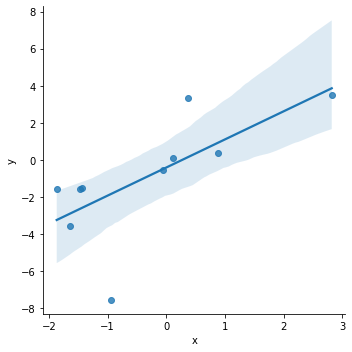

In [16]:
import pandas as pd
import seaborn as sns
x = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
y = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
data = pd.DataFrame(columns = ['x', 'y'])
data['x']=x
data['y']=y
sns.lmplot(data = data, x = "x", y = "y")

In [17]:
stats.pearsonr(x,y)
#có tương quan, tương quan thuận

PearsonRResult(statistic=0.6879696368388862, pvalue=0.0278729695144962)

In [19]:
data = pd.read_csv("Height of Male and Female by Country 2022.csv")
stats.pearsonr(data["Male Height in Cm"],data["Female Height in Cm"])
==>có tương quan, tương quan thuận

PearsonRResult(statistic=0.9287870871295011, pvalue=7.301839868669843e-87)

H0 : có tương quan
H1 : ko có tương quan
`

In [20]:
data2 = pd.read_csv("insurance.csv")
data2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
table = pd.crosstab(index = data2["sex"],columns = data2["smoker"])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


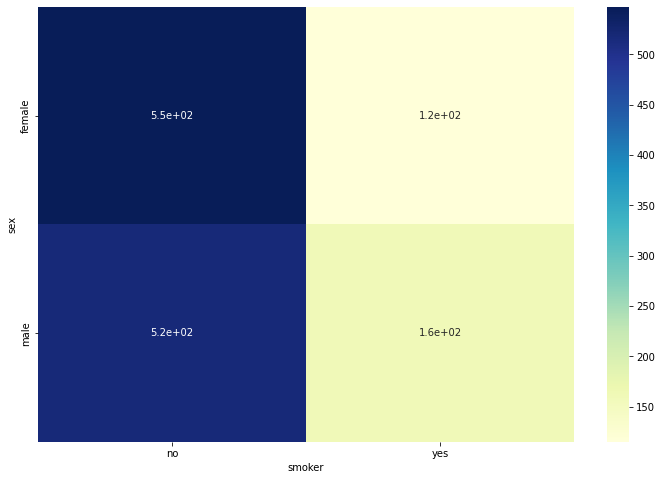

In [23]:
plt.figure(figsize=(12,8))

sns.heatmap(table, annot=True, cmap="YlGnBu");


In [24]:
stats.chi2_contingency(table)

(7.39291081459996,
 0.006548143503580697,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

In [ ]:
0.006548143503580697 giá trị pvalue ==> 0.6% ==> H0 sai, H1 đúng
==> 2 thuộc tính có tương quan với nhau
==> có mối quan hệ giữa hút thuốc và giới tính
mức độ tự do = 1


In [25]:
table1 = pd.crosstab(index=data2['smoker'], columns=data2['region'])
table1


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [26]:
stats.chi2_contingency(table1)

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

so với alpha = 5% ==> pvalue  = 6% ko thể loại bỏ H0
==> ko có tương quan

In [30]:
table2 = pd.crosstab(index = data2["sex"],columns = data2["region"])
table2

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [31]:
stats.chi2_contingency(table2)

(0.43513679354327284,
 0.9328921288772233,
 3,
 array([[160.30493274, 160.79970105, 180.09566517, 160.79970105],
        [163.69506726, 164.20029895, 183.90433483, 164.20029895]]))

so với alpha = 5% ==> pvalue  = 93% ko thể loại bỏ H0
==> ko có tương quan

In [33]:
data = pd.read_csv("subset-covid-data.csv")
data

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
...,...,...,...,...,...,...,...,...,...,...
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


In [35]:
data = data.dropna()

In [40]:
chianhom = pd.qcut(data["population"],5 ,labels = [1,2,3,4,5])
chianhom

0      5
1      2
2      5
3      1
4      4
      ..
201    4
202    5
203    4
204    4
205    4
Name: population, Length: 201, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [42]:
data["pop_cat"] = chianhom
data

C:\Users\USER\AppData\Local\Temp\ipykernel_14224\546039176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pop_cat"] = chianhom


,country,continent,date,day,month,year,cases,deaths,country_code,population,pop_cat
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0,5
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0,2
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0,5
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0,1
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0,4
...,...,...,...,...,...,...,...,...,...,...,...
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0,4
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0,5
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0,4
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0,4


In [43]:
stats.spearmanr(data["cases"], data["pop_cat"], axis = 0)

SpearmanrResult(correlation=0.5088785922888973, pvalue=1.2267869813555135e-14)

pvalue rất nhỏ ==> có mỗi tương quan giữa pop_cat và cases